# What drives the price of a car?

![](/content/sample_data/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = /content/sample_data/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary.

###     Business Understanding: Definition
The purpose of this exercise is to help predict the price of the used cars. We will use the vehicles dataset with historical price records. It will involve understanding the past data points for the used cars prices using various data analysis techniques. Using this data to explore and evaluate the best model to predict the future prices of the used cars.


### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder, MinMaxScaler, MaxAbsScaler
from sklearn.compose import make_column_transformer, TransformedTargetRegressor
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import numpy as np
import plotly.express as px
import pandas as pd
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
vehicles = pd.read_csv('/content/drive/MyDrive/AIML/Used-car-predictions/data/vehicles.csv')
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [ ]:
vehicles.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [ ]:
vehicles.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


In [ ]:
vehicles.nunique(axis=0)

id              426880
region             404
price            15655
year               114
manufacturer        42
model            29649
condition            6
cylinders            8
fuel                 5
odometer        104870
title_status         6
transmission         3
VIN             118246
drive                3
size                 4
type                13
paint_color         12
state               51
dtype: int64

In [ ]:
# Check for duplicates
vehicles.duplicated().sum()

0

In [ ]:
veh = vehicles[vehicles['year'] > 2000]

In [ ]:
# Check for missing data
vehicles.isnull().sum()

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

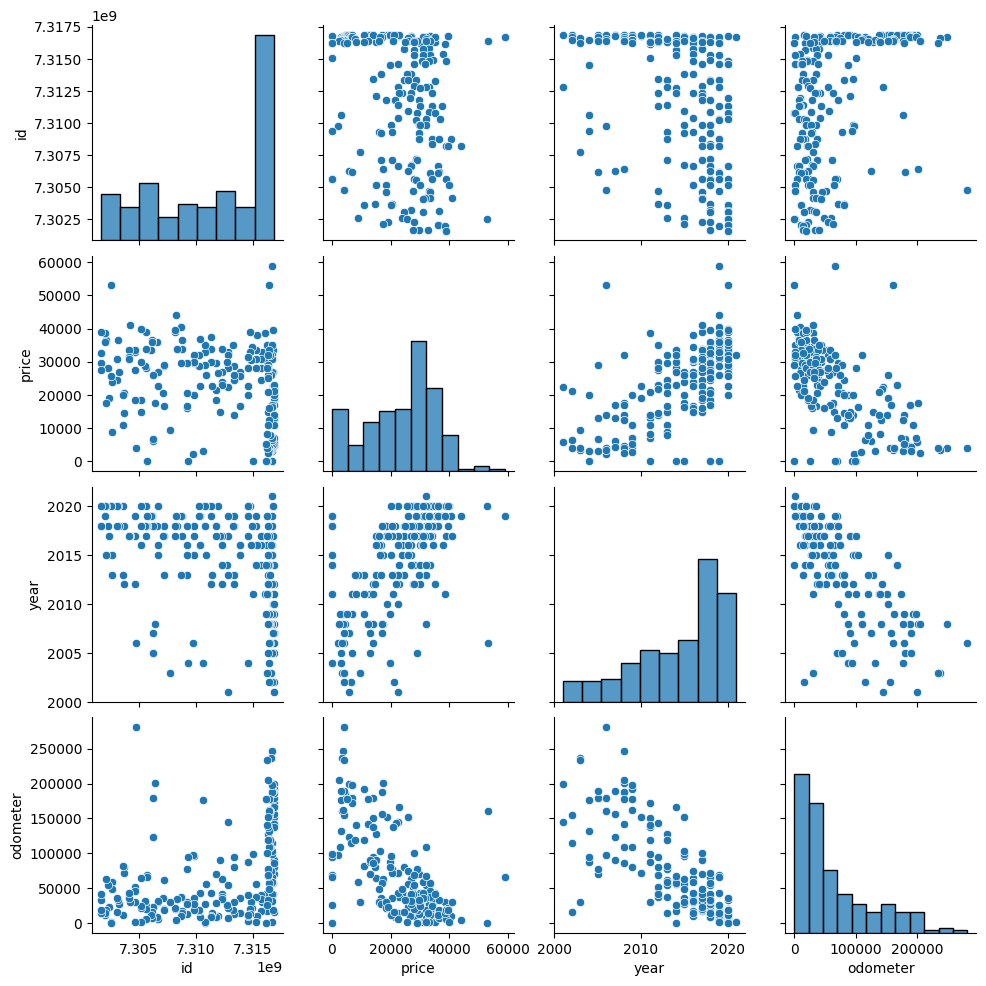

In [ ]:
# Visualize the data
sns.pairplot(veh[:200])

<Axes: >

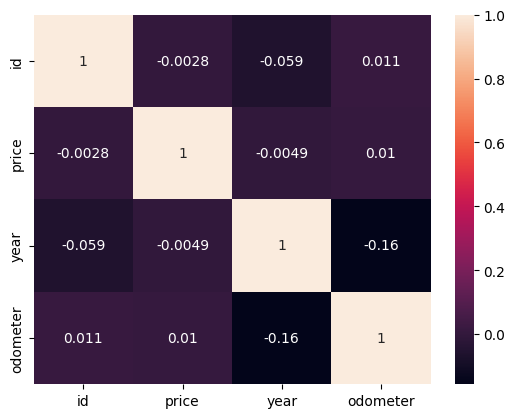

In [ ]:
# Correlation matrix
v = vehicles[['id','price', 'year', 'odometer']]
corr = v.corr()
sns.heatmap(corr, annot=True)

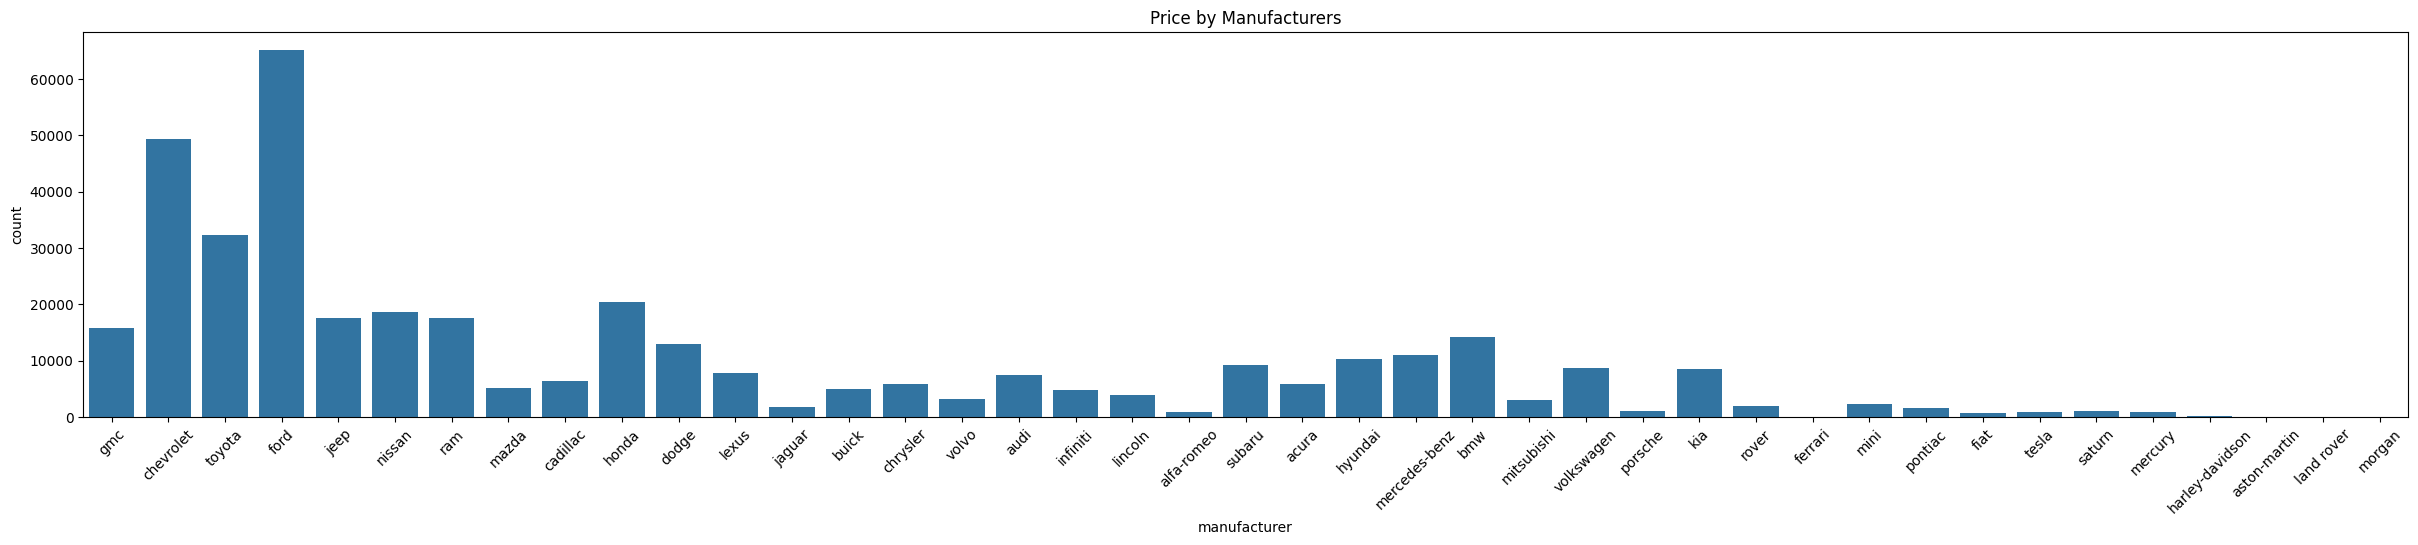

In [ ]:
plt.figure(figsize=(30, 5))
ax = sns.countplot(data=veh, x="manufacturer")
ax.tick_params(axis='x', labelrotation=45)
plt.title('Price by Manufacturers')
plt.show()

In [ ]:
manufact = vehicles.groupby('manufacturer')['price'].mean().sort_values(ascending=False).head(10)
manufact

manufacturer
mercedes-benz    531710.557333
volvo            383755.147896
toyota           234294.682621
jeep             150717.819659
chevrolet        115676.101645
ferrari          107438.736842
aston-martin      53494.541667
tesla             38354.456221
buick             36784.954736
ford              36411.718025
Name: price, dtype: float64

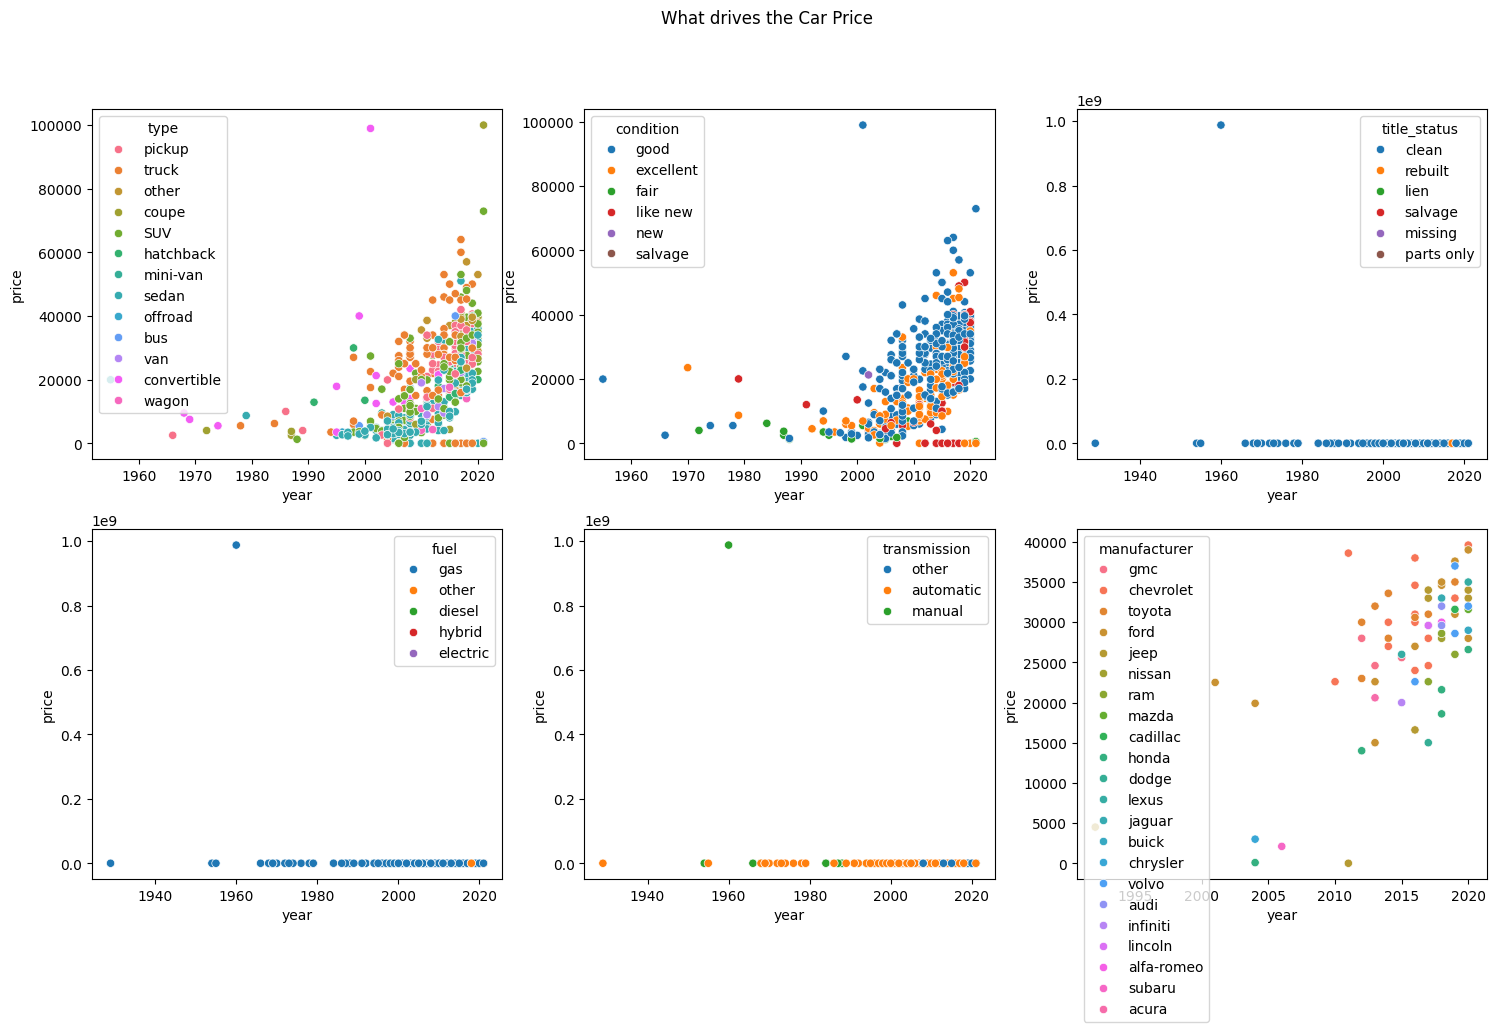

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('What drives the Car Price')
sns.scatterplot(ax=axes[0, 0], x=vehicles.year[:1000], y=vehicles.price[:1000], hue=vehicles.type)
sns.scatterplot(ax=axes[0, 1], x=vehicles.year[:1000], y=vehicles.price[:1000], hue=vehicles.condition)
sns.scatterplot(ax=axes[0, 2], x=vehicles.year[:1000], y=vehicles.price[:1000], hue=vehicles.title_status)
sns.scatterplot(ax=axes[1, 0], x=vehicles.year[:1000], y=vehicles.price[:1000], hue=vehicles.fuel)
sns.scatterplot(ax=axes[1, 1], x=vehicles.year[:1000], y=vehicles.price[:1000], hue=vehicles.transmission)
sns.scatterplot(ax=axes[1, 2], x=vehicles.year[:1000], y=vehicles.price[:1000], hue=vehicles.manufacturer.head(100))
plt.show()

###     Data Understanding
    
    


    1. Highest null entries found for the following categories
      VIN             161042
      drive           130567
      size            306361
      condition       174104
      cylinders       177678

    2. mercedes-benz and volvo have the highest priced cars
    3. Most of the dataset entries are for year 2000 and above
    4. Looking at the countplot, most of the dataset has entries for used car prices for ford, chevrolet, toyota and honda
    6. Benz and Volvo cars have relatively higher price difference, compared to other cars
    7. Price is inversely proportional to the year and odometer.

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`.

###     Data Preparation
    1. Id, VIN, drive, size, cylinders, region. model and paint_color columns are missing values for most of the columns. They will be dropped
    2. Entries with null values will be dropped
    3. Filtering the dataset to only consider the entries with date > 2000
    4. Columns 'manufacturer', 'fuel', 'type', 'condition', 'state', 'title_status', 'transmission' are categorical columns. One Hot Encoding will be applied on these columns.
    5. Applying log scale on the price.
    


> Add blockquote



In [4]:
vehicles_df = vehicles.drop(columns=['id', 'VIN', 'drive', 'size', 'cylinders', 'region', 'model', 'paint_color'])
vehicles_df = vehicles_df.dropna()
vehicles_df['odometer'] = vehicles_df['odometer'].astype(int, errors='ignore')
vehicles_df['year'] = vehicles_df['year'].astype(int, errors='ignore')
vehicles_df['price'] = vehicles_df['price'].astype(int, errors='ignore')
vehicles_df = vehicles_df[vehicles_df['year'] > 2000]
vehicles_df.describe()

,price,year,odometer
count,1.907640e+05,190764.000000,1.907640e+05
mean,4.020565e+04,2013.218946,8.684318e+04
std,8.566495e+06,4.974964,1.442826e+05
min,0.000000e+00,2001.000000,0.000000e+00
25%,7.499000e+03,2010.000000,3.004100e+04
50%,1.659000e+04,2014.000000,7.500000e+04
75%,2.840975e+04,2017.000000,1.272985e+05
max,3.736929e+09,2022.000000,1.000000e+07


In [5]:
columns_to_encode = ['manufacturer', 'fuel', 'type', 'condition', 'state', 'title_status', 'transmission']

col_transformer = ColumnTransformer([('encode_cats', OneHotEncoder(), columns_to_encode),],
                       remainder='passthrough')

In [6]:
X = vehicles_df.drop('price',axis=1)
y = vehicles_df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

###  TransformedTargetRegressor with Ridge

> Add blockquote





In [16]:
ridge_pipe = Pipeline([
             ('preprocessing', col_transformer),
             ('transform', PolynomialFeatures(degree = 2, include_bias = False)),
             ('scale', StandardScaler(with_mean=False)),
             ('ridge', Ridge())])
ridge_model = TransformedTargetRegressor(
    regressor=ridge_pipe, func=np.log1p, inverse_func=np.expm1
)

In [17]:
for i in range(2,6):
    score = cross_val_score(ridge_pipe, X_train, y_train, scoring='neg_mean_squared_error', cv=i)
    print(f'cross_val_score:{score.mean()} for degree {i}')

cross_val_score:-106676019150210.27 for degree 2
cross_val_score:-106205321407087.17 for degree 3
cross_val_score:-106112516329358.28 for degree 4
cross_val_score:-106001788822589.0 for degree 5


In [18]:
ridge_model_pipe = Pipeline([ ('model', ridge_model)])
ridge_param_dict = {'model__regressor__ridge__alpha': [.01, 1, 10, 100] }
ridge_grid = GridSearchCV(ridge_model_pipe,
                          param_grid= ridge_param_dict,
                          cv=KFold(n_splits = 3, shuffle = True, random_state = 32))
ridge_grid.fit(X_train, y_train)


GridSearchCV(cv=KFold(n_splits=3, random_state=32, shuffle=True),
             estimator=Pipeline(steps=[('model',
                                        TransformedTargetRegressor(func=<ufunc 'log1p'>,
                                                                   inverse_func=<ufunc 'expm1'>,
                                                                   regressor=Pipeline(steps=[('preprocessing',
                                                                                              ColumnTransformer(remainder='passthrough',
                                                                                                                transformers=[('encode_cats',
                                                                                                                               OneHotEncoder(),
                                                                                                                               ['manufacturer',
                                                                                                                                'fuel',
                                                                                                                                'type',
                                                                                                                                'condition',
                                                                                                                                'state',
                                                                                                                                'title_status',
                                                                                                                                'transmission'])])),
                                                                                             ('transform',
                                                                                              PolynomialFeatures(include_bias=False)),
                                                                                             ('scale',
                                                                                              StandardScaler(with_mean=False)),
                                                                                             ('ridge',
                                                                                              Ridge())])))]),
             param_grid={'model__regressor__ridge__alpha': [0.01, 1, 10, 100]})

In [20]:
ridge_grid.best_params_

{'model__regressor__ridge__alpha': 100}

In [21]:
best_ridge_model = ridge_grid.best_estimator_

###  TransformedTargetRegressor with Lasso




In [7]:
pipe_lasso = Pipeline([
         ('preprocessing', col_transformer),
         ('transform', PolynomialFeatures(degree = 2, include_bias = False)),
         ('scale', StandardScaler(with_mean=False)),
         ('lasso', Lasso())])

In [8]:
model_lasso = TransformedTargetRegressor(
    regressor=pipe_lasso, func=np.log1p, inverse_func=np.expm1
)

In [10]:
lasso_pipe = Pipeline([ ('model', model_lasso)])
params = {'model__regressor__lasso__alpha': [.1] }
lasso_grid = GridSearchCV(lasso_pipe,
                            param_grid= params,
                            cv=KFold(n_splits = 3, shuffle = True, random_state = 32))
lasso_grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=3, random_state=32, shuffle=True),
             estimator=Pipeline(steps=[('model',
                                        TransformedTargetRegressor(func=<ufunc 'log1p'>,
                                                                   inverse_func=<ufunc 'expm1'>,
                                                                   regressor=Pipeline(steps=[('preprocessing',
                                                                                              ColumnTransformer(remainder='passthrough',
                                                                                                                transformers=[('encode_cats',
                                                                                                                               OneHotEncoder(),
                                                                                                                               ['manufacturer',
                                                                                                                                'fuel',
                                                                                                                                'type',
                                                                                                                                'condition',
                                                                                                                                'state',
                                                                                                                                'title_status',
                                                                                                                                'transmission'])])),
                                                                                             ('transform',
                                                                                              PolynomialFeatures(include_bias=False)),
                                                                                             ('scale',
                                                                                              StandardScaler(with_mean=False)),
                                                                                             ('lasso',
                                                                                              Lasso())])))]),
             param_grid={'model__regressor__lasso__alpha': [0.1]})

In [12]:
lasso_grid.best_params_

{'model__regressor__lasso__alpha': 0.1}

In [13]:
best_lasso_model = lasso_grid.best_estimator_

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

###     Evaluation



Root Mean Squared Error for the Ridge and Lasso Regression models were evaluated to choose the best model for predictions. Looking at the RMSE below Rige Regression model is selected as the final model.

In [30]:
ridge_mse_train = np.sqrt(mean_squared_error(best_ridge_model.predict(X_train), y_train))
ridge_mse_test = np.sqrt(mean_squared_error(best_ridge_model.predict(X_test), y_test))
print(f'Ridge Model RMSE Train: {ridge_mse_train} ')
print(f'Ridge Model RMSE Test: {ridge_mse_test}  ')

Ridge Model RMSE Train: 10233763.150540143 
Ridge Model RMSE Test: 22915590.2176359   


In [32]:
print(f' Lasso Training dataset RMSE {np.sqrt(mean_squared_error(best_lasso_model.predict(X_train), y_train))} ')
print(f' Lasso Testing dataset RMSE  {np.sqrt(mean_squared_error(best_lasso_model.predict(X_test), y_test))} ')

 Lasso Training dataset RMSE 10233355.125899399 
 Lasso Testing dataset RMSE  51880237.29478876 


In [27]:
ridge_pipe.fit(X_train, y_train)
columns = pd.DataFrame(best_ridge_model.named_steps.model.regressor_.named_steps.transform.get_feature_names_out())
features = pd.DataFrame(ridge_pipe.named_steps['preprocessing'].get_feature_names_out())

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

###     Report

>     Based on the data analysis performed, following are the features that drive the price of the used cars
    1. mercedes-benz and volvo have the highest priced cars
    2. Most of the dataset entries are for year 2000 and above
    3. Looking at the countplot, most of the dataset has entries for used car prices for ford, chevrolet, toyota and honda
    4. Benz and Volvo cars have relatively higher price difference, compared to other cars
    5. Price is inversely proportional to the year and mileage.
     
    
